## Notebook to plot the hippocampus using Hippunfold toolbox

In [ ]:
import os
import numpy as np
import nibabel as nb
import matplotlib.pyplot as plt
from hippunfold_toolbox import plotting
from aidhs.paths import BASE_PATH

In [57]:
hemi='L'
hippunfold_path='path_to_hippunfold'
base_path=BASE_PATH
subject='H1C0001'
feature='surfarea'
label='hipp'
den='0p5mm'

output_path=os.path.join(BASE_PATH, 'images')

In [58]:
# load labels subfields
labels_file = os.path.join(base_path, 'templates', 'tmp_hemi-L_space-T1w_den-0p5mm_label-hipp_subfields.label.gii')
labels = nb.load(labels_file).darrays[0].data
subfields=list(set(labels))
subfields_name={1:'Sub', 2:'CA1', 3:'CA2', 4:'CA3', 5:'CA4', 6:'DG'} #
colors =  np.array([[0,0,128/255], [0,79/255,1], [0,200/255,1],  [0,1,108/255], [1,188/255,0], [128/255,128/255,128/255] ])

In [59]:
# load meshes
file_surf = os.path.join(hippunfold_path,f'hippunfold/sub-{subject}/surf/sub-{subject}_hemi-{hemi}_space-T1w_den-{den}_label-{label}_midthickness.surf.gii')
file_unfold = os.path.join(hippunfold_path,f'hippunfold/sub-{subject}/surf/sub-{subject}_hemi-{hemi}_space-unfolded_den-{den}_label-{label}_midthickness.surf.gii')
surf= nb.load(file_surf)
unfold= nb.load(file_unfold)

#load overlay
overlay_file=os.path.join(hippunfold_path,f'hippunfold/sub-{subject}/surf/sub-{subject}_hemi-{hemi}_space-T1w_den-{den}_label-{label}_{feature}.shape.gii')
overlay = nb.load(overlay_file).darrays[0].data

#load mask
cortex_file = os.path.join(base_path,'templates',f'tmp_hemi-L_space-unfolded_den-0p5mm_label-{label}_midthickness_mask.surf.gii')
cortex_mask = nb.load(cortex_file).darrays[0].data
cortex_mask = np.array(cortex_mask, dtype=bool)

/home/mathilde/Programs/hippunfold_toolbox/hippunfold_toolbox/plotting.py:125: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if cdata=='fill':
/home/mathilde/Programs/hippunfold_toolbox/hippunfold_toolbox/plotting.py:105: UserWarning: Attempting to set identical bottom == top == 1.171875 results in singular transformations; automatically expanding.
  ax.set_zlim([np.min(v[:,2]),np.max(v[:,2])])


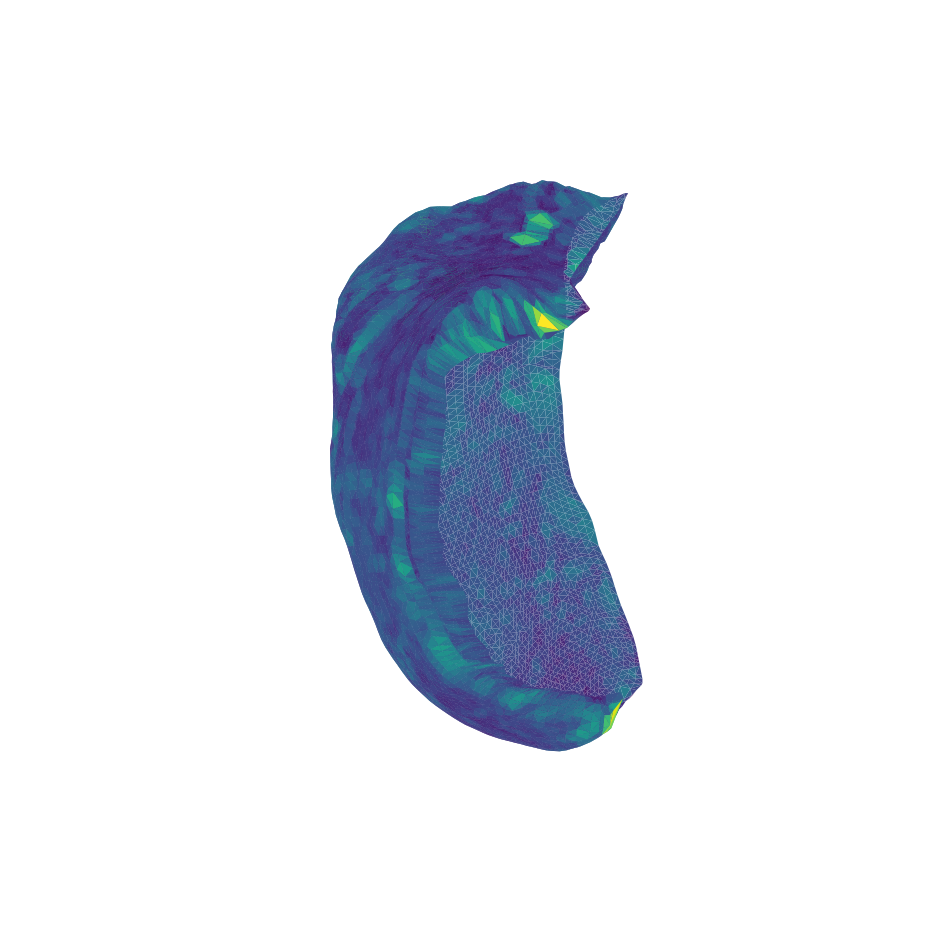

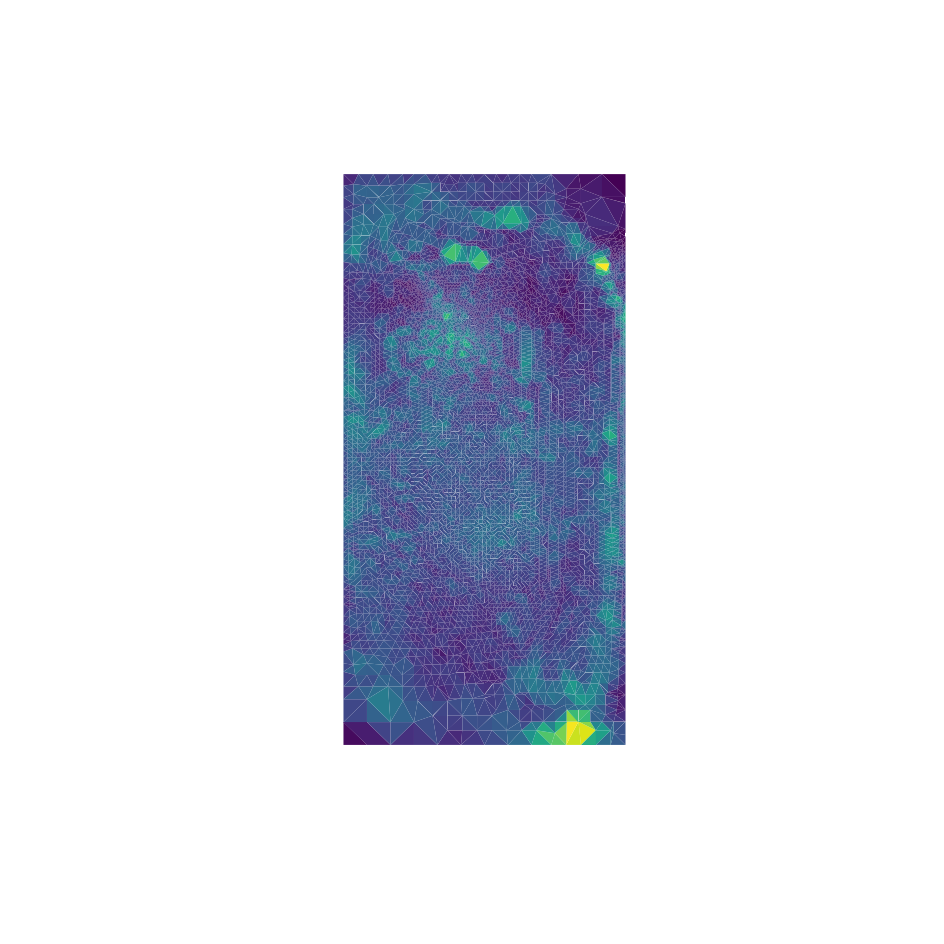

In [6]:
# plot fold and unfold hippocampus

fig,ax = plotting.plot_gifti(surf,overlay)
ax.view_init(elev=90, azim=-90)
plt.savefig(f'{output_path}/canonical_{label}_{subject}_{feature}.png', dpi=96, transparent =True)

fig,ax = plotting.plot_gifti(unfold,overlay)
ax.view_init(elev=-90, azim=0)
plt.savefig(f'{output_path}/canonical_{label}_unfold_{subject}_{feature}.png', dpi=96, transparent =True)

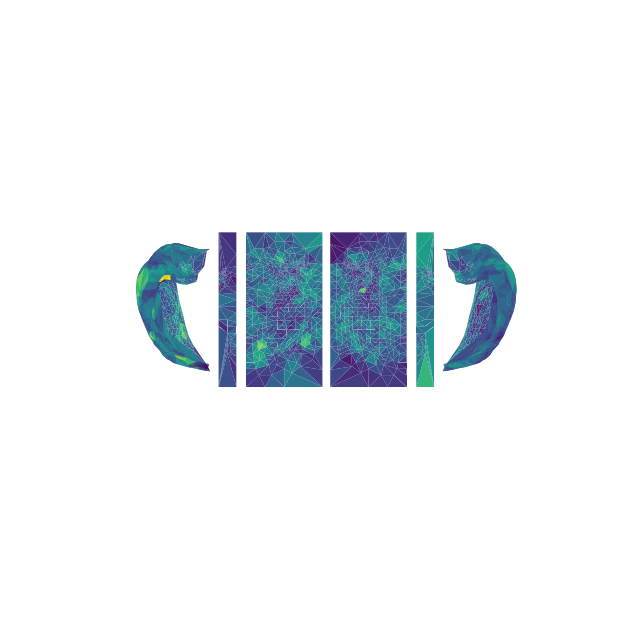

In [10]:
# plot hippocampi in canonical view with both hemispheres and fold and unfolded states

hemi = ['L','R']
label = ['hipp', 'dentate']

# load the hippocampal functional data
hipp_func = np.array([])
for h in range(len(hemi)):
    for l in range(len(label)):
        f = nb.load(os.path.join(hippunfold_path,f'hippunfold/sub-{subject}/surf/sub-{subject}_hemi-{hemi[h]}_space-T1w_den-0p5mm_label-{label[l]}_{feature}.shape.gii'))
        # format into a Vxt matric (vertices x timepoints)
        fvol = np.zeros((len(f.darrays[0].data),len(f.darrays)))
        for t in range(len(f.darrays)):
            fvol[:,t] = f.darrays[t].data
        hipp_func = np.vstack((hipp_func,fvol)) if hipp_func.size else fvol

# plot (only the first timepoint)
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8,8), subplot_kw={'projection': "3d"})
plotting.surfplot_canonical_foldunfold(ax, hipp_func[:,0], den='2mm')

plt.savefig(f'{output_path}/canonical_surfaces_{subject}_{feature}.png', dpi=96, transparent =True)


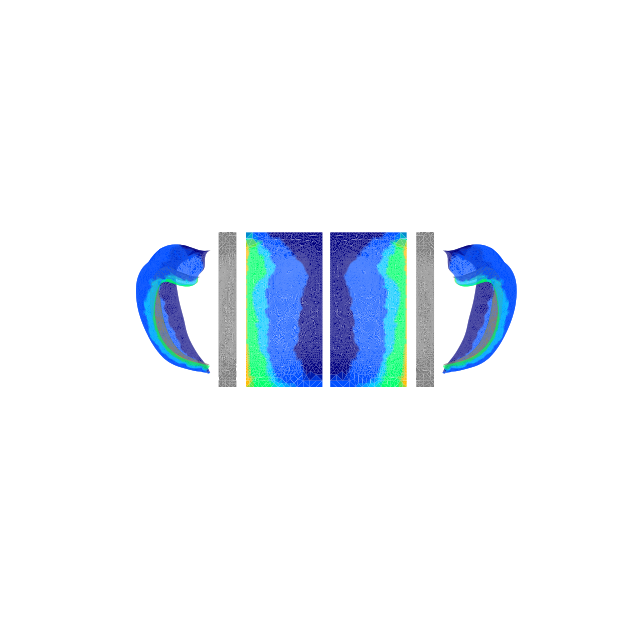

In [54]:
# plot hippocampi with subfields

hemi = ['L','R']
label = ['hipp', 'dentate']

import numpy as np
import matplotlib.pyplot as plt
import nibabel as nib
import sys
from hippunfold_toolbox import plotting
import importlib
importlib.reload(plotting)


subject = 'H1C0001'
hemi = ['L','R']
den = '0p5mm'
label = ['hipp','dentate']


# load the hippocampal functional data
hipp_func = np.array([])
for h in range(len(hemi)):
    for l in range(len(label)):
        if label[l] == 'hipp':
            # format into a Vxt matric (vertices x timepoints)
            fvol = np.zeros((7262,1))
            fvol[:,0] = labels
        else:
            fvol = np.zeros((1788,1))
            fvol[:,0] = np.ones(len(fvol))*6
        # format into a Vxt matric (vertices x timepoints)
        hipp_func = np.vstack((hipp_func,fvol)) if hipp_func.size else fvol


#plot
# plot (only the first timepoint)
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8,8), subplot_kw={'projection': "3d"})
plotting.surfplot_canonical_foldunfold(ax, hipp_func[:,0], den=den, cmap=colors)

plt.savefig(f'{output_path}/canonical_surfaces_subfields.png', dpi=96, transparent =True)

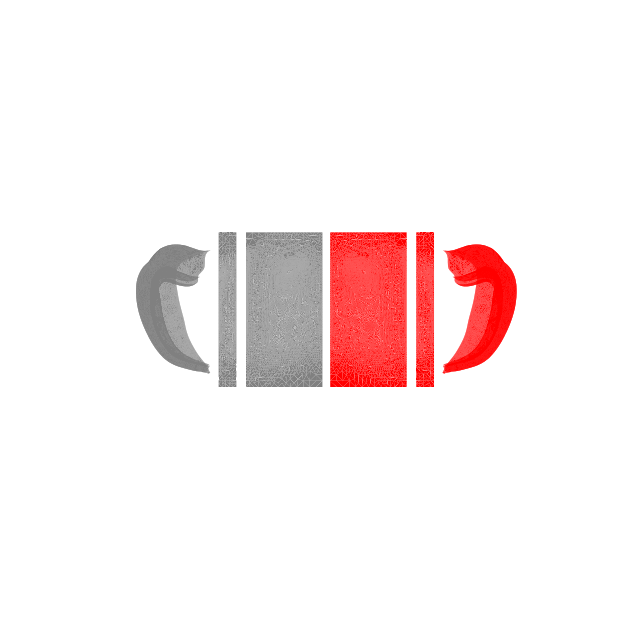

In [62]:
# plot ispi and contra

import numpy as np
import matplotlib.pyplot as plt
import nibabel as nib
import sys
from hippunfold_toolbox import plotting
import importlib
importlib.reload(plotting)


subject = 'H1C0001'
hemi = ['L','R']
den = '0p5mm'
label = ['hipp','dentate']
colors =  np.array([[128/255,128/255,128/255], [1,0,0]])

# load the hippocampal functional data
hipp_func = np.array([])
for h in range(len(hemi)):
    for l in range(len(label)):
        if label[l] == 'hipp':
            # format into a Vxt matric (vertices x timepoints)
            fvol = np.zeros((7262,1))
            if hemi[h]=='L':
                fvol[:,0] = np.ones(len(fvol))*1
            else:
                fvol[:,0] = np.ones(len(fvol))*2
        else:
            fvol = np.zeros((1788,1))
            if hemi[h]=='L':
                fvol[:,0] = np.ones(len(fvol))*1
            else:
                fvol[:,0] = np.ones(len(fvol))*2
        # format into a Vxt matric (vertices x timepoints)
        hipp_func = np.vstack((hipp_func,fvol)) if hipp_func.size else fvol


#plot
# plot (only the first timepoint)
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8,8), subplot_kw={'projection': "3d"})
plotting.surfplot_canonical_foldunfold(ax, hipp_func[:,0], den=den, cmap=colors)

plt.savefig(f'{output_path}/canonical_surfaces_detectedpatients.png', dpi=96, transparent =True)